# Summer Olympics Data Analysis Project

### Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("summer.csv")

In [3]:
df.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


## 1. In how many cities Summer Olympics is held so far? 

In [4]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [5]:
print("No of cities in which Summer Olympics had held so far : " , df['City'].nunique())

No of cities in which Summer Olympics had held so far :  22


### No of cities in which Summer Olympics had held so far :  22

## 2. Which sport is having most number of Gold Medals so far? (Top 5) 

In [6]:
st=df[df.Medal=='Gold']
data=[]
st['Sport'].unique()
for sport in st['Sport'].unique():
  data.append([sport,len(st[st['Sport'] == sport])])

df1=pd.DataFrame(data,columns = ['Sport','Gold medals'])
print("Top 5 sports having most number of Gold medals")
df1.sort_values(by='Gold medals',ascending=False).head()

Top 5 sports having most number of Gold medals


,Sport,Gold medals
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


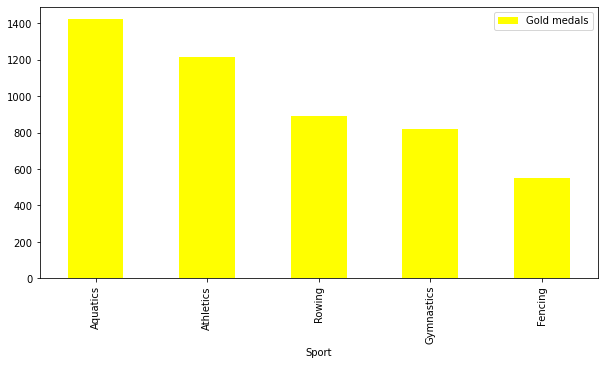

In [8]:
df1.sort_values(by='Gold medals', ascending=False).head().plot(x = 'Sport', y = 'Gold medals', kind = 'bar', figsize = (10,5), color='yellow')
plt.show()

## 3. Which sport is having most number of medals so far? (Top 5) 

In [10]:
print("Top 5 Sports having most number of Medals")
df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()

Top 5 Sports having most number of Medals


Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

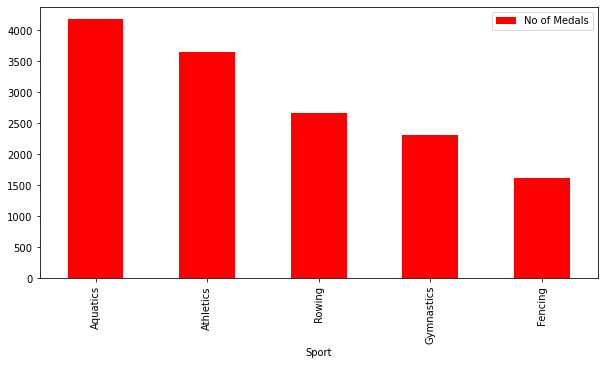

In [9]:
df.groupby('Sport').Medal.count().sort_values(ascending = False).reset_index(name = 'No of Medals').head().plot(x = 'Sport', y = 'No of Medals', kind = 'bar' ,figsize = (10,5)  , color = 'red')
plt.show()

## 4. Which player has won most number of medals? (Top 5) 

In [11]:
print("Top 5 Athletes having most number of Medals")
df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()

Top 5 Athletes having most number of Medals


Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64

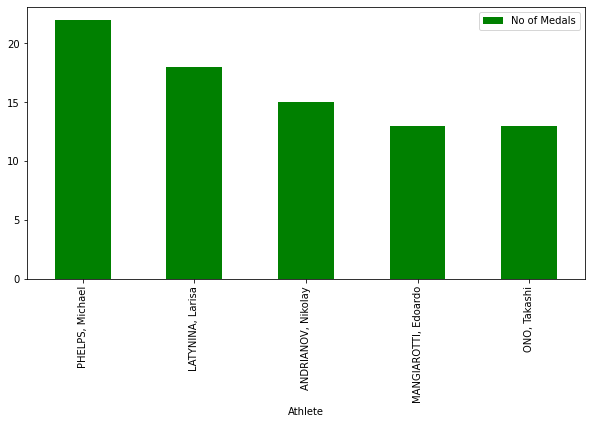

In [12]:
df.groupby('Athlete').Medal.count().sort_values(ascending = False).reset_index(name = 'No of Medals').head().plot(x = 'Athlete', y = 'No of Medals', kind = 'bar' ,figsize = (10,5), color = 'green')
plt.show()

## 5. Which player has won most number Gold Medals of medals? (Top 5) 

In [13]:
print("Top 5 Athletes having most number of Gold Medals")
df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()

Top 5 Athletes having most number of Gold Medals


Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64

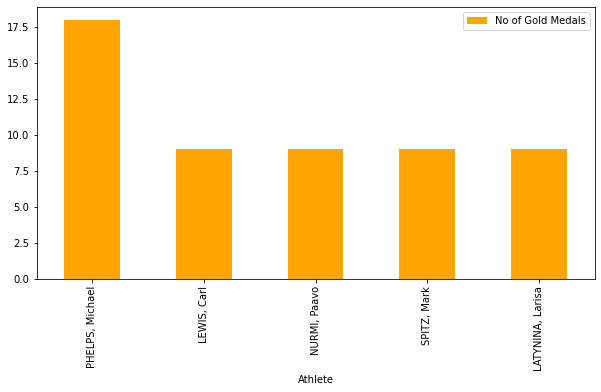

In [15]:
df[df.Medal == 'Gold'].groupby('Athlete').Medal.count().sort_values(ascending = False).head().reset_index(name = 'No of Gold Medals').plot(x = 'Athlete', y = 'No of Gold Medals', kind = 'bar' ,figsize = (10,5), color = 'orange')
plt.show()

## 6. In which year India won first Gold Medal in Summer Olympics? 

In [16]:
india_first_gold_medal = df[df['Country'] == 'IND'] 
india_first_gold_medal = india_first_gold_medal[india_first_gold_medal['Medal'] == 'Gold'] 
india_first_gold_medal = india_first_gold_medal.sort_values(by = 'Year', ascending = True).head(1)
india_first_gold_medal

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


### Year in which India won its first gold medal :- 1928

## 7. Which event is most popular in terms on number of players? (Top 5)

In [17]:
print("Top 5 Most Popular Events in terms of Number of Players")
df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head()

Top 5 Most Popular Events in terms of Number of Players


Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

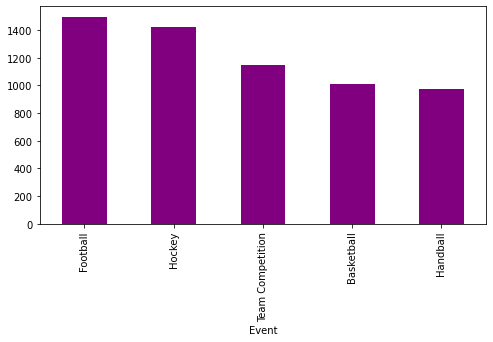

In [19]:
df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head().plot(kind='bar',figsize=(8,4),color='purple')
plt.show()

## 8. Which sport is having most female Gold Medalists? (Top 5) 

In [20]:
data=[]
for sport in df['Sport'].unique():
  data.append([sport,len(df[(df['Sport']==sport) & (df['Medal']=='Gold') & (df['Gender']=='Women')])])

df2 = pd.DataFrame(data,columns = ['Sport','Female gold medalist'])
print("Top 5 female Gold Medalist")
df3=df2.sort_values(by='Female gold medalist', ascending=False).head()
df3

Top 5 female Gold Medalist


,Sport,Female gold medalist
0,Aquatics,589
1,Athletics,389
4,Gymnastics,268
17,Rowing,217
35,Volleyball,166


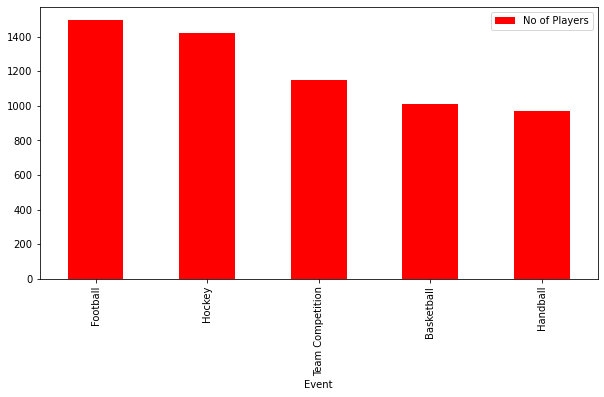

In [21]:
df.groupby('Event').Athlete.count().sort_values(ascending = False).reset_index(name = 'No of Players').head().plot(x = 'Event', y = 'No of Players', kind = 'bar' ,figsize = (10,5), color="red")
plt.show()